# Explore OSMI survey datasets of 2020
    
##    About OSMI - Open Sourcing Mental Illness
    Open Sourcing Mental Illness is a non-profit corporation dedicated to raising awareness, educating, and providing resources to support mental wellness in the tech and open source communities.Open Sourcing Mental Illness is a non-profit, 501(c)(3) corporation dedicated to raising awareness, educating, and providing resources to support mental wellness in the tech and open source communities.
https://osmihelp.org/

    Every year, OSMI publishes a survey report since 2016  


## OSMI Mental Health In Tech Survey 2020

    This dataset was published on Kaggle the 2nd of January based on 2020 survey.
https://www.kaggle.com/osmihelp/osmi-2020-mental-health-in-tech-survey-results

    This usrvey is Biais by te fact the participantsare volontaries sensible to this topic 


    XXXXXXX from Word




In [1]:
import pandas as pd
import matplotlib as plt
#!pip install pandas_profiling
import pandas_profiling as pp

## 1. Data overview

Observations:
1. The dataset is composed by 180 answers to the survey.
2. The survey is composed by 120 questions
3. Many NaN values because answering to the questions is not mandatory and because some questions are not always relevant as: 
 1. The US state when you already answerd working our of US
 2. Question related employeers for self-employed people



In [36]:
df = pd.read_csv('data/OSMI/OSMI-2020.csv')
print('Shape of the dataframe = ' , df.shape)
df.head(2)

Shape of the dataframe =  (180, 120)


,#,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,...,"If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,Other.3,What country do you *work* in?,What US state or territory do you *work* in?
0,zwrffw6ykfo82ft1twvzwrffw6c6wsfv,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,45,Male,United States of America,Connecticut,White,NaN,United States of America,Connecticut
1,zhdmhaa8r0125c4zmoi7qzhdmtjrakhm,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,24,female,Russia,NaN,NaN,NaN,Russia,NaN


## 2. Analysing missing values

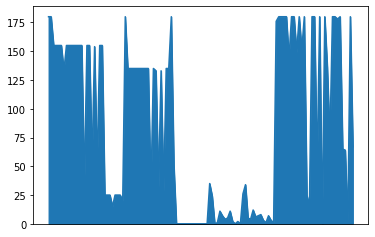

In [6]:
# Counting values by column
values_by_columns = df.notnull().sum()

values_by_columns.plot(kind='area', xticks=[]);

#### 81 questions have more than 10% of answeers. The others will not be analyzed

Number of questions with enough answers -->  81


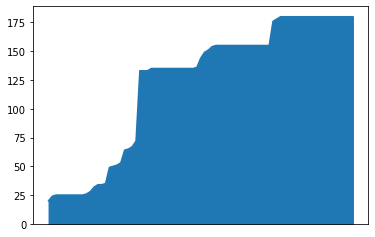

In [101]:
columns_with_answers = values_by_columns[values_by_columns > 18].sort_values()
print('Number of questions with enough answers --> ', columns_with_answers.count())

columns_with_answers.plot(kind='area', xticks=[]);

### By ploting the number of values by columns, we can observe a stairs effect.
    
- 20   columns have 180 values (0 NaN)

- 15   columns have 155 values (25 NaN) 
- 8    columns have 25 values (155 NaN)

- 12   columns have 135 values

- 3   columns have 133 values


### Verifying the hypothesis that the various columns with 155 or 25 values are related to the 155 employees and 25 self-contractors

The display of the questions with 155 values and the ones with 25 values do not validate the hypothesis.
Let's check if the answeers matche one by one.

In [121]:
columns_with_155_answers = columns_with_answers[columns_with_answers == 155].keys().to_list()
rows_employees = df['*Are you self-employed?*'] == 0 

df.loc[rows_employees, columns_with_155_answers].notnull().sum()

Is your employer primarily a tech company/organization?                                                                                           155
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?            155
Does your employer offer resources to learn more about mental health disorders and options for seeking help?                                      155
Does your employer provide mental health benefits as part of healthcare coverage?                                                                 155
If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?              155
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?    155
Have you ever discussed your mental health with coworkers?                                          

In [122]:
columns_with_25_answers = columns_with_answers[columns_with_answers == 25].keys().to_list()
rows_self_employed = df['*Are you self-employed?*'] == 1 

df.loc[rows_self_employed, columns_with_25_answers].notnull().sum()

Do you know local or online resources to seek help for a mental health issue?                                                                                                         25
Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.     6
If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?                                                          25
If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?                                                               25
Do you believe your productivity is ever affected by a mental health issue?                                                                                                           25
Has being identified as a person with a mental health issue affected your c

In [124]:
df.loc[rows_employees, columns_with_25_answers].notnull().sum()

Do you know local or online resources to seek help for a mental health issue?                                                                                                          0
Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.    19
If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?                                                           0
If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?                                                                0
Do you believe your productivity is ever affected by a mental health issue?                                                                                                            0
Has being identified as a person with a mental health issue affected your c

    
    
------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Investigating the group of 12 column with 135 values

The 12 questions content are related to previous employers.

I propose the hypothesis that the 12 questions with 135 answeers were provided only by the persons with a specific answeer to the other question '*Do you have previous employers?*'





In [136]:
# List of questions with exactly 135 values
columns_with_answers[columns_with_answers == 135]

Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?    135
Overall, how much importance did your previous employer place on physical health?                                                               135
Overall, how much importance did your previous employer place on mental health?                                                                 135
Did you ever discuss your mental health with your previous employer?                                                                            135
Would you have been willing to discuss your mental health with your direct supervisor(s)?                                                       135
Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?                        135
Did your previous employers provide resources to learn more about mental health disorders and how to seek help? 

In [141]:
# 135 persons answered that they have previous employers 

df['*Do you have previous employers?*'].value_counts()

1    135
0     45
Name: *Do you have previous employers?*, dtype: int64

In [149]:
columns_with_135_answers = columns_with_answers[columns_with_answers == 135].keys().to_list()
rows_previous_employer = df['*Do you have previous employers?*'] == 1 

df.loc[rows_previous_employer, columns_with_135_answers].notnull().sum()


Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?    135
Overall, how much importance did your previous employer place on physical health?                                                               135
Overall, how much importance did your previous employer place on mental health?                                                                 135
Did you ever discuss your mental health with your previous employer?                                                                            135
Would you have been willing to discuss your mental health with your direct supervisor(s)?                                                       135
Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?                        135
Did your previous employers provide resources to learn more about mental health disorders and how to seek help? 

### Result on the hypothesis 135+25 validation

The hypothesis was partially validated as:
- All the 155 answeers of the columns with 155 values were provided by employees
- Not all the 25 answeers of the columns with 25 values were provided by self-employed. Only two questions could not justify the 155 NaN because were answered by a mix ox employees





In [135]:
for c in columns_with_answers.keys():
    if('resources' in c):
        print(c)
# 'online resources'

Do you know local or online resources to seek help for a mental health issue?
Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?
Did your previous employers provide resources to learn more about mental health disorders and how to seek help?
Does your employer offer resources to learn more about mental health disorders and options for seeking help?
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?


## Data preparation

In [71]:
# df[2019].columns.to_list()





Would you feel more comfortable talking to your coworkers about your physical health or your mental health?



